In [322]:
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [323]:
housing = pd.DataFrame(pd.read_csv("./Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [324]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Define map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to housing list
housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [325]:
# Splitting Data into Training and Validation Sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [326]:
df_test.shape

(109, 13)

In [327]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalScaler = MinMaxScaler()
standScaler = StandardScaler()

In [328]:
def compute_cost(X, y, theta):
 predictions = X.dot(theta) # H = X * Theta 
 errors = np.subtract(predictions, y) # H - Y
 sqrErrors = np.square(errors) # Square of above
 J = 1 / (2 * len(X)) * np.sum(sqrErrors) # Sum of above array, multiply by 1/(2m)
 return J

In [329]:
def gradient_descent(X, y, theta, alpha, iterations, xTest, yTest):
 cost_history = np.zeros(iterations) # Store loss calculations in array to be able to plot gradient descent
 testCost_history = np.zeros(iterations) # Store validation loss
 for i in range(iterations):
    predictions = X.dot(theta) # H = X * Theta
    errors = np.subtract(predictions, y) # H - Y
    derivLoss = (1 / len(X)) * X.transpose().dot(errors); # Finishes derivative of loss calculation
    theta = theta - (alpha * derivLoss); # Calculates for new thetas
    cost_history[i] = compute_cost(X, y, theta) # Stores new cost from the new thetas
    testCost_history[i] = compute_cost(xTest, yTest, theta) # Stores validation cost from new thetas
 return theta, cost_history, testCost_history

In [330]:
#Problem 2a

In [331]:
num_vars_2a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_newTrain_2aMinMax = df_train[num_vars_2a]
df_newTest_2aMinMax = df_test[num_vars_2a]

df_newTrain_2aStand = df_train[num_vars_2a]
df_newTest_2aStand = df_test[num_vars_2a]
df_newTrain_2aMinMax.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [332]:
#y_2a = df_newTrain_2aMinMax.pop('price')
#X_newTrain_2aMinMax = df_newTrain_2aMinMax.copy()
#X_newTrain_2aMinMax.head()

In [333]:
#import warnings
#warnings.filterwarnings('ignore')

# Min/Max Normalization
df_newTrain_2aMinMax[num_vars_2a] = normalScaler.fit_transform(df_newTrain_2aMinMax[num_vars_2a])
df_newTest_2aMinMax[num_vars_2a] = normalScaler.fit_transform(df_newTest_2aMinMax[num_vars_2a])
df_newTrain_2aMinMax.head(5)

,area,bedrooms,bathrooms,stories,parking,price
542,0.124199,0.2,0.0,0.0,0.0,0.000000
496,0.150654,0.2,0.0,0.0,0.0,0.081818
484,0.083821,0.2,0.0,0.0,0.0,0.096970
507,0.122807,0.2,0.0,0.0,0.0,0.072727
252,0.558619,0.4,0.0,0.0,0.0,0.239394


In [334]:
y_normTrain_2a = df_newTrain_2aMinMax.pop('price')
X_normTrain_2a = df_newTrain_2aMinMax.copy()

y_normTest_2a = df_newTest_2aMinMax.pop('price')
X_normTest_2a = df_newTest_2aMinMax.copy()
X_normTrain_2a.head()

,area,bedrooms,bathrooms,stories,parking
542,0.124199,0.2,0.0,0.0,0.0
496,0.150654,0.2,0.0,0.0,0.0
484,0.083821,0.2,0.0,0.0,0.0
507,0.122807,0.2,0.0,0.0,0.0
252,0.558619,0.4,0.0,0.0,0.0


In [335]:
y_2a = y_normTrain_2a.values
X_2a = X_normTrain_2a.values[:,0:5]

testy_2a = y_normTest_2a.values
testX_2a = X_normTest_2a.values[:, 0:5]

X0_2a = np.ones((len(df_newTrain_2aMinMax),1))
X = np.hstack((X0_2a, X_2a))
X0_2a = np.ones((len(df_newTest_2aMinMax),1))
testX = np.hstack((X0_2a, testX_2a))
X[:10]

array([[1.        , 0.12419939, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.15065441, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.08382066, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.12280702, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.55861877, 0.4       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.14842662, 0.4       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.13951546, 0.4       , 0.        , 0.33333333,
        0.33333333],
       [1.        , 0.55444166, 0.6       , 0.5       , 0.33333333,
        0.66666667],
       [1.        , 0.12559176, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.11723754, 0.2       , 0.5       , 0.        ,
        0.        ]])

In [336]:
thetaX_2a = np.zeros(6)
alphaX_2a = 0.0025
iterations = 1000

In [337]:
thetaX_2a, costX_2a_history, testCostX_2a_history = gradient_descent(X, y_2a, thetaX_2a, alphaX_2a, iterations, testX, testy_2a) 
print('Final value of theta for 2a =', thetaX_2a)

Final value of theta for 2a = [0.1680599  0.06563284 0.08153202 0.06163319 0.07810329 0.07053487]


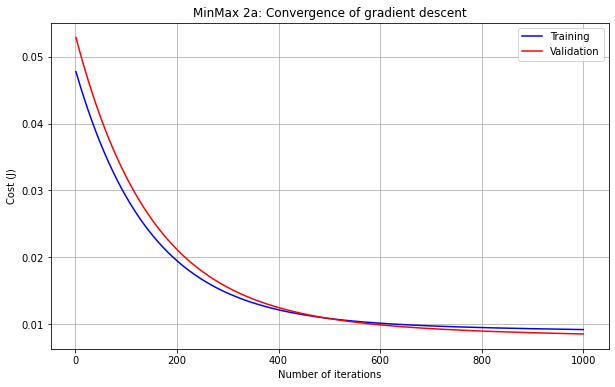

In [338]:
plt.plot(range(1, iterations + 1),costX_2a_history, color='blue', label='Training')
plt.plot(range(1, iterations + 1),testCostX_2a_history, color='red', label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('MinMax 2a: Convergence of gradient descent')
plt.legend(loc="upper right")

In [339]:
#import warnings
#warnings.filterwarnings('ignore')

# Standardization
df_newTrain_2aStand[num_vars_2a] = standScaler.fit_transform(df_newTrain_2aStand[num_vars_2a])
df_newTest_2aStand[num_vars_2a] = standScaler.fit_transform(df_newTest_2aStand[num_vars_2a])
df_newTrain_2aStand.head(5)

,area,bedrooms,bathrooms,stories,parking,price
542,-0.716772,-1.294376,-0.573307,-0.933142,-0.819149,-1.586001
496,-0.538936,-1.294376,-0.573307,-0.933142,-0.819149,-1.090971
484,-0.988206,-1.294376,-0.573307,-0.933142,-0.819149,-0.999299
507,-0.726132,-1.294376,-0.573307,-0.933142,-0.819149,-1.145974
252,2.203478,0.052516,-0.573307,-0.933142,-0.819149,-0.137579


In [340]:
y_standTrain_2a = df_newTrain_2aStand.pop('price')
X_standTrain_2a = df_newTrain_2aStand.copy()

y_standTest_2a = df_newTest_2aStand.pop('price')
X_standTest_2a = df_newTest_2aStand.copy()
X_standTrain_2a.head()

,area,bedrooms,bathrooms,stories,parking
542,-0.716772,-1.294376,-0.573307,-0.933142,-0.819149
496,-0.538936,-1.294376,-0.573307,-0.933142,-0.819149
484,-0.988206,-1.294376,-0.573307,-0.933142,-0.819149
507,-0.726132,-1.294376,-0.573307,-0.933142,-0.819149
252,2.203478,0.052516,-0.573307,-0.933142,-0.819149


In [341]:
y_2a = y_standTrain_2a.values
X_2a = X_standTrain_2a.values[:,0:5]

testy_2a = y_standTest_2a.values
testX_2a = X_standTest_2a.values[:, 0:5]

X0_2a = np.ones((len(df_newTrain_2aStand),1))
X = np.hstack((X0_2a, X_2a))
X0_2a = np.ones((len(df_newTest_2aStand),1))
testX = np.hstack((X0_2a, testX_2a))
X[:10]

array([[ 1.        , -0.71677205, -1.29437561, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        , -0.53893631, -1.29437561, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        , -0.98820554, -1.29437561, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        , -0.72613182, -1.29437561, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        ,  2.20347795,  0.05251643, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        , -0.55391195,  0.05251643, -0.57330726,  0.21291401,
        -0.81914879],
       [ 1.        , -0.61381451,  0.05251643, -0.57330726,  0.21291401,
         0.32555914],
       [ 1.        ,  2.17539862,  1.39940847,  1.4755613 ,  0.21291401,
         1.47026706],
       [ 1.        , -0.70741227, -1.29437561, -0.57330726, -0.93314164,
        -0.81914879],
       [ 1.        , -0.76357092, -1.29437561,  1.4755613 , -0.93314164,
        -0.81914879]])

In [342]:
thetaX_2a = np.zeros(6)
alphaX_2a = 0.0025
iterations = 1000

In [343]:
thetaX_2a, costX_2a_history, testCostX_2a_history = gradient_descent(X, y_2a, thetaX_2a, alphaX_2a, iterations, testX, testy_2a) 
print('Final value of theta for 2a =', thetaX_2a)

Final value of theta for 2a = [2.27355723e-16 3.59558602e-01 1.21634716e-01 2.87552510e-01
 2.24160071e-01 1.73930844e-01]


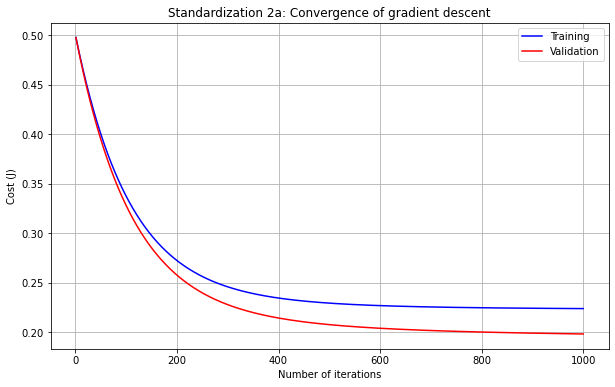

In [344]:
plt.plot(range(1, iterations + 1),costX_2a_history, color='blue', label='Training')
plt.plot(range(1, iterations + 1),testCostX_2a_history, color='red', label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Standardization 2a: Convergence of gradient descent')
plt.legend(loc="upper right")

In [345]:
# Problem 2b
num_vars_2b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_newTrain_2b = df_train[num_vars_2b]
df_newTest_2b = df_test[num_vars_2b]
df_newTrain_2b.head(10)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,3620,2,1,1,1,0,0,0,0,0,0,1750000
496,4000,2,1,1,1,0,0,0,0,0,0,2695000
484,3040,2,1,1,0,0,0,0,0,0,0,2870000
507,3600,2,1,1,1,0,0,0,0,0,0,2590000
252,9860,3,1,1,1,0,0,0,0,0,0,4515000
263,3968,3,1,2,0,0,0,0,0,0,0,4410000
240,3840,3,1,2,1,0,0,0,0,1,1,4585000
175,9800,4,2,2,1,1,0,0,0,2,0,5250000
385,3640,2,1,1,1,0,0,0,0,0,0,3570000
374,3520,2,2,1,1,0,1,0,0,0,0,3640000


In [346]:
# Min/Max Normalization
df_newTrain_2b[num_vars_2b] = normalScaler.fit_transform(df_newTrain_2b[num_vars_2b])
df_newTest_2b[num_vars_2b] = normalScaler.fit_transform(df_newTest_2b[num_vars_2b])
df_newTrain_2b.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,0.124199,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
496,0.150654,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081818
484,0.083821,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096970
507,0.122807,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072727
252,0.558619,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239394


In [347]:
y_normTrain_2b = df_newTrain_2b.pop('price')
X_normTrain_2b = df_newTrain_2b.copy()

y_normTest_2b = df_newTest_2b.pop('price')
X_normTest_2b = df_newTest_2b.copy()
X_normTrain_2b.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,0.124199,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.150654,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
484,0.083821,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.122807,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.558619,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [348]:
y_2b = y_normTrain_2b.values
X_2b = X_normTrain_2b.values[:,0:11]

testy_2b = y_normTest_2b.values
testX_2b = X_normTest_2b.values[:, 0:11]

X0_2b = np.ones((len(df_newTrain_2b),1))
X = np.hstack((X0_2b, X_2b))
X0_2b = np.ones((len(df_newTest_2b),1))
testX = np.hstack((X0_2b, testX_2b))
X[:10]

array([[1.        , 0.12419939, 0.2       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.15065441, 0.2       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.08382066, 0.2       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.12280702, 0.2       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.55861877, 0.4       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.14842662, 0.4       , 0.        , 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ,

In [349]:
thetaX_2b = np.zeros(12)
alphaX_2b = 0.0025
iterations = 1000

In [350]:
thetaX_2b, costX_2b_history, testCostX_2b_history = gradient_descent(X, y_2b, thetaX_2b, alphaX_2b, iterations, testX, testy_2b) 
print('Final values of theta for 2b =', thetaX_2b)

Final values of theta for 2b = [0.08463254 0.04101946 0.04783239 0.04720978 0.05367438 0.08143048
 0.0337865  0.03850947 0.01360807 0.06859696 0.04558418 0.05092703]


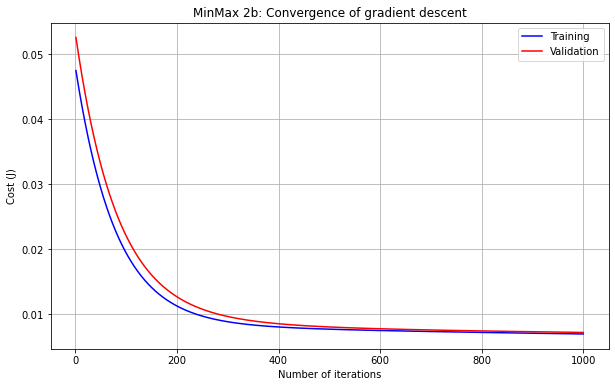

In [351]:
plt.plot(range(1, iterations + 1),costX_2b_history, color='blue', label='Training')
plt.plot(range(1, iterations + 1),testCostX_2b_history, color='red', label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('MinMax 2b: Convergence of gradient descent')
plt.legend(loc="upper right")

In [352]:
# Standardization
num_vars_2b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_newTrain_2b = df_train[num_vars_2b]
df_newTest_2b = df_test[num_vars_2b]

df_newTrain_2b[num_vars_2b] = standScaler.fit_transform(df_newTrain_2b[num_vars_2b])
df_newTest_2b[num_vars_2b] = standScaler.fit_transform(df_newTest_2b[num_vars_2b])
df_newTrain_2b.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,-0.716772,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-1.586001
496,-0.538936,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-1.090971
484,-0.988206,-1.294376,-0.573307,-0.933142,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-0.999299
507,-0.726132,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-1.145974
252,2.203478,0.052516,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-0.137579


In [353]:
y_normTrain_2b = df_newTrain_2b.pop('price')
X_normTrain_2b = df_newTrain_2b.copy()

y_normTest_2b = df_newTest_2b.pop('price')
X_normTest_2b = df_newTest_2b.copy()
X_normTrain_2b.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,-0.716772,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
496,-0.538936,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
484,-0.988206,-1.294376,-0.573307,-0.933142,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
507,-0.726132,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
252,2.203478,0.052516,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288


In [354]:
y_2b = y_normTrain_2b.values
X_2b = X_normTrain_2b.values[:,0:11]

testy_2b = y_normTest_2b.values
testX_2b = X_normTest_2b.values[:, 0:11]

X0_2b = np.ones((len(df_newTrain_2b),1))
X = np.hstack((X0_2b, X_2b))
X0_2b = np.ones((len(df_newTest_2b),1))
testX = np.hstack((X0_2b, testX_2b))
X[:10]

array([[ 1.        , -0.71677205, -1.29437561, -0.57330726, -0.93314164,
         0.39559913, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761],
       [ 1.        , -0.53893631, -1.29437561, -0.57330726, -0.93314164,
         0.39559913, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761],
       [ 1.        , -0.98820554, -1.29437561, -0.57330726, -0.93314164,
        -2.52781141, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761],
       [ 1.        , -0.72613182, -1.29437561, -0.57330726, -0.93314164,
         0.39559913, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761],
       [ 1.        ,  2.20347795,  0.05251643, -0.57330726, -0.93314164,
         0.39559913, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761],
       [ 1.        , -0.55391195,  0.05251643, -0.57330726,  0.21291401,
        -2.52781141, -

In [355]:
thetaX_2b = np.zeros(12)
alphaX_2b = 0.0025
iterations = 1000

In [356]:
thetaX_2b, costX_2b_history, testCostX_2b_history = gradient_descent(X, y_2b, thetaX_2b, alphaX_2b, iterations, testX, testy_2b) 
print('Final values of theta for 2b =', thetaX_2b)

Final values of theta for 2b = [2.26737589e-16 2.65860994e-01 8.91541758e-02 2.46738932e-01
 1.85909858e-01 9.49708605e-02 9.56415353e-02 7.96716462e-02
 1.10048184e-01 2.11600417e-01 1.26435097e-01 1.60306721e-01]


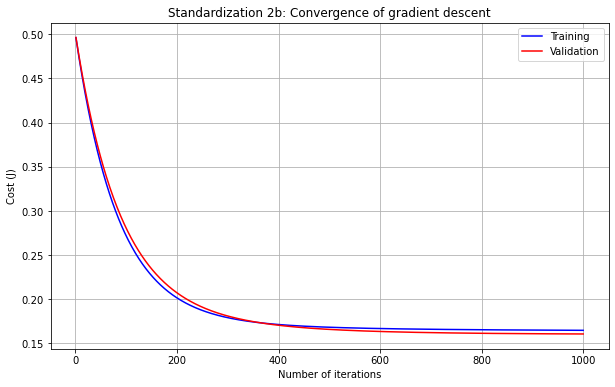

In [357]:
plt.plot(range(1, iterations + 1),costX_2b_history, color='blue', label='Training')
plt.plot(range(1, iterations + 1),testCostX_2b_history, color='red', label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Standardization 2b: Convergence of gradient descent')
plt.legend(loc="upper right")

In [358]:
# Problem 3

In [359]:
def gradient_descent_penalties(X, y, theta, alpha, iterations, xTest, yTest, penaltyRate):
 cost_history = np.zeros(iterations) # Store loss calculations in array to be able to plot gradient descent
 testCost_history = np.zeros(iterations) # Store validation loss
 for i in range(iterations):
    predictions = X.dot(theta) # H = X * Theta
    errors = np.subtract(predictions, y) # H - Y
    penalty = np.multiply((penaltyRate/len(X)), theta)
    derivLoss = (1 / len(X)) * (X.transpose().dot(errors) + penalty); # Finishes derivative of loss calculation
    theta = theta - (alpha * derivLoss); # Calculates for new thetas
    cost_history[i] = compute_cost(X, y, theta) # Stores new cost from the new thetas
    testCost_history[i] = compute_cost(xTest, yTest, theta) # Stores validation cost from new thetas
 return theta, cost_history, testCost_history

In [360]:
# Problem 3a
num_vars_3a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_newTrain_3a = df_train[num_vars_3a]
df_newTest_3a = df_test[num_vars_3a]

In [361]:
# Min/Max Normalization
df_newTrain_3a[num_vars_3a] = normalScaler.fit_transform(df_newTrain_3a[num_vars_3a])
df_newTest_3a[num_vars_3a] = normalScaler.fit_transform(df_newTest_3a[num_vars_3a])
df_newTrain_3a.head(5)

,area,bedrooms,bathrooms,stories,parking,price
542,0.124199,0.2,0.0,0.0,0.0,0.000000
496,0.150654,0.2,0.0,0.0,0.0,0.081818
484,0.083821,0.2,0.0,0.0,0.0,0.096970
507,0.122807,0.2,0.0,0.0,0.0,0.072727
252,0.558619,0.4,0.0,0.0,0.0,0.239394


In [362]:
y_normTrain_3a = df_newTrain_3a.pop('price')
X_normTrain_3a = df_newTrain_3a.copy()

y_normTest_3a = df_newTest_3a.pop('price')
X_normTest_3a = df_newTest_3a.copy()
X_normTrain_3a.head()

,area,bedrooms,bathrooms,stories,parking
542,0.124199,0.2,0.0,0.0,0.0
496,0.150654,0.2,0.0,0.0,0.0
484,0.083821,0.2,0.0,0.0,0.0
507,0.122807,0.2,0.0,0.0,0.0
252,0.558619,0.4,0.0,0.0,0.0


In [363]:
y_3a = y_normTrain_3a.values
X_3a = X_normTrain_3a.values[:,0:5]

testy_3a = y_normTest_3a.values
testX_3a = X_normTest_3a.values[:, 0:5]

X0_3a = np.ones((len(df_newTrain_3a),1))
X = np.hstack((X0_3a, X_3a))
X0_3a = np.ones((len(df_newTest_3a),1))
testX = np.hstack((X0_3a, testX_3a))
X[:10]

array([[1.        , 0.12419939, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.15065441, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.08382066, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.12280702, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.55861877, 0.4       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.14842662, 0.4       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.13951546, 0.4       , 0.        , 0.33333333,
        0.33333333],
       [1.        , 0.55444166, 0.6       , 0.5       , 0.33333333,
        0.66666667],
       [1.        , 0.12559176, 0.2       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.11723754, 0.2       , 0.5       , 0.        ,
        0.        ]])

In [364]:
thetaX_3a = np.zeros(6)
alphaX_3a = 0.0025
iterations = 1500
lambdaPen = 0.5

In [365]:
thetaX_3a, costX_3a_history, testCostX_3a_history = gradient_descent_penalties(X, y_3a, thetaX_3a, alphaX_3a, iterations, testX, testy_3a, lambdaPen) 
print('Final values of theta for 3a =', thetaX_3a)

Final values of theta for 3a = [0.16332631 0.07620808 0.08529764 0.07592121 0.08824125 0.08029126]


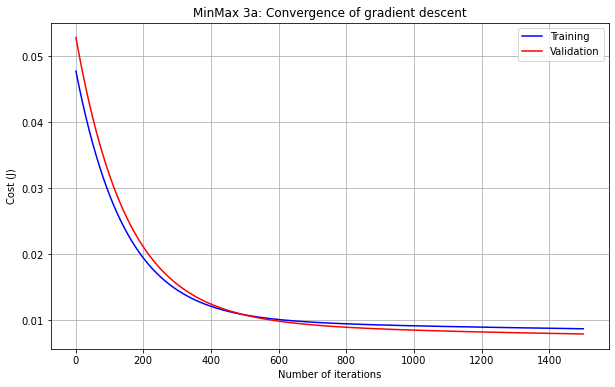

In [366]:
plt.plot(range(1, iterations + 1),costX_3a_history, color='blue', label='Training')
plt.plot(range(1, iterations + 1),testCostX_3a_history, color='red', label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('MinMax 3a: Convergence of gradient descent')
plt.legend(loc="upper right")

In [367]:
#Problem 3b
# Min/Max Normalization
num_vars_3b = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_newTrain_3b = df_train[num_vars_3b]
df_newTest_3b = df_test[num_vars_3b]

df_newTrain_3b[num_vars_3b] = normalScaler.fit_transform(df_newTrain_3b[num_vars_3b])
df_newTest_3b[num_vars_3b] = normalScaler.fit_transform(df_newTest_3b[num_vars_3b])
df_newTrain_3b.head(5)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,0.124199,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
496,0.150654,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081818
484,0.083821,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096970
507,0.122807,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072727
252,0.558619,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239394


In [368]:
y_normTrain_3b = df_newTrain_3b.pop('price')
X_normTrain_3b = df_newTrain_3b.copy()

y_normTest_3b = df_newTest_3b.pop('price')
X_normTest_3b = df_newTest_3b.copy()
X_normTrain_3b.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,0.124199,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.150654,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
484,0.083821,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.122807,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
252,0.558619,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [369]:
y_3b = y_normTrain_3b.values
X_3b = X_normTrain_3b.values[:,0:11]

testy_3b = y_normTest_3b.values
testX_3b = X_normTest_3b.values[:, 0:11]

X0_3b = np.ones((len(df_newTrain_3b),1))
X = np.hstack((X0_3b, X_3b))
X0_3b = np.ones((len(df_newTest_3b),1))
testX = np.hstack((X0_3b, testX_3b))
X[:10]

array([[1.        , 0.12419939, 0.2       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.15065441, 0.2       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.08382066, 0.2       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.12280702, 0.2       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.55861877, 0.4       , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.14842662, 0.4       , 0.        , 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ,

In [370]:
thetaX_3b = np.zeros(12)
alphaX_3b = 0.0025
iterations = 1000
lambdaPen = 0.5

In [371]:
thetaX_3b, costX_3b_history, testCostX_3b_history = gradient_descent_penalties(X, y_3b, thetaX_3b, alphaX_3b, iterations, testX, testy_3b, lambdaPen) 
print('Final values of theta for 3b =', thetaX_3b)

Final values of theta for 3b = [0.0846325  0.04101939 0.04783233 0.04720967 0.05367428 0.08143043
 0.03378644 0.03850944 0.01360803 0.06859683 0.04558409 0.05092694]


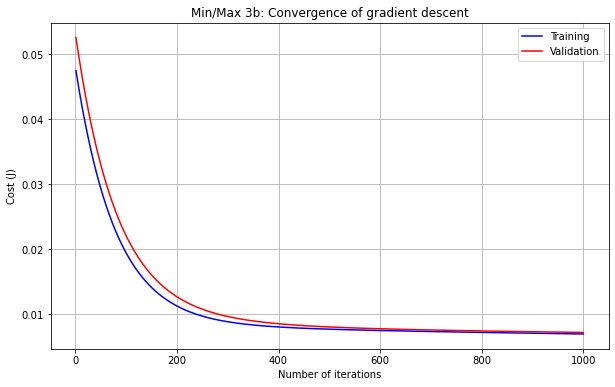

In [372]:
plt.plot(range(1, iterations + 1),costX_3b_history, color='blue', label='Training')
plt.plot(range(1, iterations + 1),testCostX_3b_history, color='red', label='Validation')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Min/Max 3b: Convergence of gradient descent')
plt.legend(loc="upper right")